In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']

# nice_names = ["OTU","KMER","KMER"]

#select_labels =["Raw","Phen Correct"]#["raw","BMC","ComBat","limma","SmartSVA (sv=7)","MINERVA (sv=6)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
#["raw","MINERVA+ (sv=8)", "MINERVA+ (sv=9)","MINERVA+ (sv=10)","MINERVA (sv=8)","MINERVA (sv=9)","MINERVA (sv=10)"]# ["raw","ComBat","limma","SmartSVA (sv=10)","MINERVA (sv=10)"]##[0.20,0.40,0.60,0.80]#["raw","ComBat","BMC","limma","SmartSVA (sv=1)","MINERVA (sv=1)"]# ["5-mer","6-mer","7-mer"]#


trans = "clr_scale"
key = "Gibbons_PhenoCorrect_multi"

if key == "Wirbel_PhenoCorrect":
    phen = ["DiseaseState","DiseaseState"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_wirbel_otu","CRC_wirbel_otu_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #

    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "Wirbel_DataAugmentation":
    phen = ["DiseaseState","DiseaseState"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_wirbel_otu","CRC_wirbel_otu_DataAugmentation"]
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","DataAugmentation"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #

    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"

if key == "Thomas_kmer_PredDomainPheno":
    
    phen = ["bin_crc_adenomaORnormal","domain_pheno"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["Thomas_k6","Thomas_k6_PredDomainPheno"]
    file_names = ['rawfilter_TRUE','PredDomainPhenofilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PredDomainPheno"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word = "accuracy"
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "Thomas_kmer_PhenoCorrect_multi":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["Thomas_k6","Thomas_k6_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word = "accuracy"
    chosen_classifier = "Naive Bayes"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"

if key == "Thomas_kmer_DataAugment":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["Thomas_k6","Thomas_k6_DataAugmentation"]
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","DataAugmentation"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word = "accuracy"
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
    
if key == "AGP_BMI_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
    phen = ["bmi_corrected" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "BMI" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont" 
    
    folder_names = ["AGP_max_k7" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    metric_word = "pearson"
    chosen_classifier = "Naive Bayes"
    title = 'Pearson for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"

if key == "Thomas_kmer":
    numPc = [0,0,0,0,3,7,4] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["Thomas_k6" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE','refactor_first3filter_TRUE','smartsva_first7filter_TRUE','minerva_first4filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","Refactor (sv=3)","SmartSVA (sv=7)","MINERVA (sv=4)"]
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True

if key == "Thomas_kmer_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_crc_normal" for i in range(len(numPc))]#"bin_crc_adenomaORnormal" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["Thomas_k6" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False

    
if key == "Thomas":
    numPc = [0,0]
    phen = "bin_crc_normal"# #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_crc_adenomaORnormal"#""bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"#"class
    folder_names = ['CRC_thomas_otu', 'CRC_thomas_otu_DataAugmentation']
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
if key == "Thomas_mse":
    numPc = [0,0]
    phen = "bin_crc_normal"# #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_crc_adenomaORnormal"#""bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont"#"class"
    folder_names = ['CRC_thomas_otu', 'CRC_thomas_otu_PhenCorrect']
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
if key == "Gibbons_calibrate":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50] 
    folder_names = ["CRC_k7" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_labels = numPc
if key == "Gibbons":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0,0,0,10,10] 
    folder_names = ["CRC_k7" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE',
             'smartsva_first10filter_TRUE','minerva_first10filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","SmartSVA (sv=10)","MINERVA (sv=10)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
if key == "Gibbons_DataAugment":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_DataAugmentation"]
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    select_columns_bool = True
    metric_word = "accuracy"
    select_labels = ["Raw","DataAugmentation"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "Gibbons_PhenoCorrect_multi":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

    metric_word = "accuracy"
    select_labels = ["Raw","PhenoCorrection"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    

if key == "Gibbons_PredDomainPheno":
    phen = ["bin_crc_adenomaORnormal","domain_pheno"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_PredDomainPheno"]
    file_names = ['rawfilter_TRUE','PredDomainPhenofilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PredDomainPheno"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #

    
if key == "Wirbel_PredDomainPheno":
    phen = ["DiseaseState","domain_pheno"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_wirbel_otu","CRC_wirbel_otu_PredDomainPheno"]
    file_names = ['rawfilter_TRUE','PredDomainPhenofilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PredDomainPheno"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    
if key == "Gibbons_PhenoCorrect_reg":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont"
    metric_word = 'pearson'
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'Pearson for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    
    
if key == "Thomas_PhenoCorrect":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_thomas_otu","CRC_thomas_otu_PhenoCorrect"]
    file_names =['rawfilter_TRUE']+['PhenoCorrectfilter_TRUE']
    select_labels = numPc
    metric_word =  'auc_all'
if key == "Thomas_DomainCorrect":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_thomas_otu" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['DomainCorrectfilter_TRUE']
    select_labels = file_names
    metric_word =  'auc_all'
if key == "T2D":
    numPc = [0,0,0,0,1,4,1] 
    phen = ["bin_t2d" for i in range(len(numPc))] #" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "diabetes status" 
    phen_type = "class"
    
    
    folder_names = ["T2D_k7" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE',
             'refactor_first1filter_TRUE','smartsva_first4filter_TRUE','minerva_first1filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma",'Refactor (sv=1)','SmartSVA (sv=4)',
                     "MINERVA (sv=1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word =  'auc_all'
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    chosen_classifier = "Random Forest"
    
if key == "T2D_calibrate":


    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_t2d" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "diabetes status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["T2D_k7" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['refactor_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = ["Raw"] + ["Refactor" + str(i) for i in range(1,len(numPc))] 
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    
#[0,1,2,3,10,20,40,60,80,100,140,150,200,220,240,260,300]#[0,1,2,3,10,20,30,40,50, 60, 70, 80 ,10]#
lin_model = "reg"
not_rotate = False
data_type = "kmer"
 #[0,0,0,0,1,1]#
#[0,1,2,3,4,5,6,7,8,9,10]#[0,0,0,0,5,5]#[0,1,2,3,4,5,6,7,8,9,10]##[20,30,40,50,60,70,80,90,100,110,120,130,150,200]#[0,0,0,0,3,1,2]#[0,1,2,3,4,5,6,7,8,9,10]###,20,30,40,50,100,120,140] #[0,0,0,0,10,10,1] # [0
#[key_folder for i in range(len(numPc))]
#folder_names = [key_folder for i in range(len(numPc))]
#folder_names = ['AGP_max_k6_subsample_' + str(i) + '_seed_1' for i in [20,40,60,80]]
#['CRC_k6' for i in range(len(numPc))]#
# ["AGP_max_k5","AGP_max_k6","AGP_max_k7"]#,"AGP_max_k8"]#['AGP_max_k7' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE','smartsva_first2filter_TRUE','minerva_first2filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]

#file_names = ['rawfilter_TRUE']+['mine3rva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

#file_names =['rawfilter_TRUE']+['minerva_plus_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,4)] + ['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(4,7)] 
#file_names =['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#file_names =['rawfilter_TRUE' for i in range(0,len(numPc))] 

#file_names =['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
# #

# file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE',
#              'smartsva_first7filter_TRUE','minerva_first6filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#'bmcfilter_TRUE','limmafilter_TRUE', ''refactor_first2filter_TRUE',
#file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','bmcfilter_TRUE','limmafilter_TRUE', 'smartsva_first6filter_TRUE','refactor_first7filter_TRUE','minerva_first7filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['refactor_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

file_names = [f + "_trans_" + trans for f in file_names]
nice_names = ["7" + '-mer' for i in range(len(numPc))]

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

if phen_type == "cont":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"
    classifier_ofc = "Lin"
    title = 'Pearson correlation of ' + phen_pretty# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
else:
    #'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier_ofc = "Mixed"
    classifier = [chosen_classifier for f in file_names]#"Naive Bayes"#""Naive Bayes"#Random Forest"#Random Forest"#"#'Regression'#"Random Forest"

    #title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 


In [4]:
folder_names

['CRC_k7', 'CRC_k7_PhenoCorrect']

In [5]:
len(file_names)

2

In [6]:
folder_names

['CRC_k7', 'CRC_k7_PhenoCorrect']

In [7]:
df_metric = pd.DataFrame()

In [8]:
phen

['bin_crc_adenomaORnormal', 'bin_crc_adenomaORnormal']

In [9]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        # "_lin_model_" + lin_model + "/cont_pred/"
        filename_temp = data_folder + folder_names[f] +"/"+ data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] +"_lin_model_" + lin_model + "_pearson_and_mse.pkl"
        
    else:
        filename_temp = data_folder + folder_names[f] + "/"+ data_type + "_BatchCorrected_"+ phen[f] + "_" + file_names[f] + "_classification_auc.pkl"
    print(filename_temp)
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        
        if metric_word == "auc_all" or metric_word == "accuracy":
            index = folder_names[f] + file_names[f]
            #index = folder_names[f]
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            #index = folder_names[f] + file_names[f]
            index = file_names[f]
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_k7/kmer_BatchCorrected_bin_crc_adenomaORnormal_rawfilter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_k7_PhenoCorrect/kmer_BatchCorrected_bin_crc_adenomaORnormal_PhenoCorrectfilter_TRUE_trans_clr_scale_classification_auc.pkl


In [10]:
metric_word

'accuracy'

In [11]:
df_metric
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

,CRC_k7rawfilter_TRUE_trans_clr_scale,CRC_k7_PhenoCorrectPhenoCorrectfilter_TRUE_trans_clr_scale
0,0.611111,0.638889
1,0.666667,0.583333
2,0.527778,0.694444
3,0.500000,0.444444
4,0.555556,0.750000
5,0.694444,0.666667
6,0.555556,0.555556
7,0.472222,0.666667
8,0.638889,0.638889
9,0.583333,0.444444


In [12]:
file_names

['rawfilter_TRUE_trans_clr_scale', 'PhenoCorrectfilter_TRUE_trans_clr_scale']

In [13]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
#select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

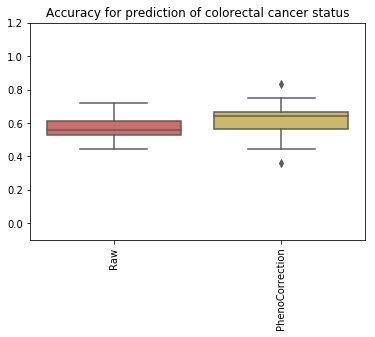

In [14]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only

current_palette = sns.color_palette()
#sns.palplot(current_palette)
palette = sns.color_palette("hls", 8)
plot_color = palette.as_hex()


# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
if metric_word == "pearson":
    g.set(ylim=(-0.1, 0.3))
else:
    g.set(ylim=(-0.1,1.2))
g.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans +  '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')








In [15]:
df_metric.mean(axis=0)

CRC_k7rawfilter_TRUE_trans_clr_scale                          0.577222
CRC_k7_PhenoCorrectPhenoCorrectfilter_TRUE_trans_clr_scale    0.620556
dtype: float64

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CRC_k7rawfilter_TRUE_trans_clr_scale v.s. CRC_k7_PhenoCorrectPhenoCorrectfilter_TRUE_trans_clr_scale: t-test independent samples with Bonferroni correction, P_val=9.908e-03 stat=-2.630e+00


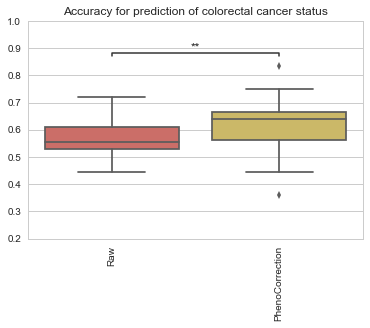

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")


x = "Method"
y = "AUC"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df_metric,palette=plot_color)
if pair_test_all:
    add_stat_annotation(ax, data=df_metric,
                    box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                              (df_metric.columns[0], df_metric.columns[2]),
                              (df_metric.columns[0], df_metric.columns[3]),
                              (df_metric.columns[0], df_metric.columns[4]),
                              (df_metric.columns[0], df_metric.columns[5]),
                              (df_metric.columns[0], df_metric.columns[6])],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)
else:
    add_stat_annotation(ax, data=df_metric,
                    box_pairs=[(df_metric.columns[0], df_metric.columns[1])],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)
# , (df_metric.columns[0], df_metric.columns[5])
ax.set_xticklabels(rotation=90,labels = select_labels)
ax.set(ylim=(0.2,1))
ax.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '_2.pdf',bbox_inches='tight')
#(df_metric.columns[0], df_metric.columns[2]),
#                              (df_metric.columns[0], df_metric.columns[3]),
#                             (df_metric.columns[0], df_metric.columns[4]),
#                             (df_metric.columns[0], df_metric.columns[5])

In [17]:
from scipy.stats import ttest_ind


ttest_ind(df_metric[df_metric.columns[0]], df_metric[df_metric.columns[4]])


IndexError: index 4 is out of bounds for axis 0 with size 2